In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statistics import mode
import seaborn as sns
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score

In [2]:
classes = ["coast", "highway", "mountain", "opencountry", "tallbuilding"]

In [3]:
dir = "../datasets/2B/"
sizes = []
for i in classes:
    sizes.append(len(os.listdir(dir + i + "/train/")))

In [4]:
sizes

[251, 182, 261, 287, 249]

In [5]:
# feature_set = {"coast" : [], "highway" : [], "insidecity" : [], "opencountry" : [], "tallbuilding" : []}
feature_set = {"coast" : np.zeros((36,sizes[0], 23)), "highway" : np.zeros((36,sizes[1], 23)), "mountain" :np.zeros((36,sizes[2], 23)), "opencountry" :np.zeros((36,sizes[3], 23)), "tallbuilding":np.zeros((36, sizes[4], 23))}

In [6]:
for i in classes:
    for n, filename in enumerate(os.listdir(dir + i + "/train/")):
        df = pd.read_csv(dir + i + "/train/" + filename, delimiter= " ", header=None).values
        for k in range(36):
            feature_set[i][k][n] = df[k]

In [7]:
feature_set[i][1].shape

(249, 23)

In [27]:
class GMM_3:
    def __init__(self,X,number_of_sources,iterations):
        self.iterations = iterations
        self.number_of_sources = number_of_sources
        self.X = X # The dimensions of X is 200*23
        self.mu = None
        self.pi = None
        self.cov = None
        self.XY = None
        
    """Define a function which runs for iterations, iterations"""
    def run(self):
        self.reg_cov = 1e-6*np.identity(self.X.shape[1])
        x,y = np.meshgrid(np.sort(self.X[:,0]),np.sort(self.X[:,1]))
        self.XY = np.array([x.flatten(),y.flatten()]).T
        
        """ 1. Set the initial mu, covariance and pi values"""
        self.mu = np.random.randint(-1,1,size=(self.number_of_sources,self.X.shape[1]))
        self.cov = np.zeros((self.number_of_sources,self.X.shape[1],self.X.shape[1]))
        
        for dim in range(len(self.cov)):
            np.fill_diagonal(self.cov[dim],5)
            
        self.pi = np.ones(self.number_of_sources)/self.number_of_sources # Are Fractions
        log_likelihoods = []
        
        for i in range(self.iterations):
            """E Step"""
            r_ic = np.zeros((len(self.X),len(self.cov)))
            for m,co,p,r in zip(self.mu,self.cov,self.pi,range(len(r_ic[0]))):
                co += self.reg_cov
                mn = multivariate_normal(mean=m,cov=co)
                r_ic[:,r] = p*mn.pdf(self.X)/np.sum([pi_c*multivariate_normal(mean=mu_c,cov=cov_c).pdf(self.X) for 
pi_c,mu_c,cov_c in zip(self.pi,self.mu,self.cov+self.reg_cov)],axis=0)
                
            """M Step"""
            self.mu = []
            self.cov = []
            self.pi = []
            log_likelihood = []
            
            for c in range(len(r_ic[0])):
                m_c = np.sum(r_ic[:,c],axis=0)
                mu_c = (1/m_c)*np.sum(self.X*r_ic[:,c].reshape(len(self.X),1),axis=0)
                self.mu.append(mu_c)
                self.cov.append(((1/m_c)*np.dot((np.array(r_ic[:,c]).reshape(len(self.X),1)*(self.X-mu_c)).T,(self.X-mu_c)))+self.reg_cov)
                self.pi.append(m_c/np.sum(r_ic))
                
            """Log likelihood"""
            log_likelihoods.append(np.log(np.sum([k*multivariate_normal(self.mu[i],self.cov[j]).pdf(self.X) for k,i,j in zip(self.pi,range(len(self.mu)),range(len(self.cov)))])))
            
        fig2 = plt.figure(figsize=(10,10))
        ax1 = fig2.add_subplot(111)
        ax1.set_title('Log-Likelihood')
        ax1.plot(range(0,self.iterations,1),log_likelihoods)
        #plt.show()
        return [self.mu, self.cov, self.pi]

done gmm for feature  0
done gmm for feature  1
done gmm for feature  2
done gmm for feature  3
done gmm for feature  4
done gmm for feature  5
done gmm for feature  6
done gmm for feature  7
done gmm for feature  8
done gmm for feature  9


<ipython-input-8-e7bfe754d2a6>:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2 = plt.figure(figsize=(10,10))


done gmm for feature  10
done gmm for feature  11
done gmm for feature  12
done gmm for feature  13
done gmm for feature  14
done gmm for feature  15
done gmm for feature  16
done gmm for feature  17
done gmm for feature  18
done gmm for feature  19
done gmm for feature  20
done gmm for feature  21
done gmm for feature  22
done gmm for feature  23
done gmm for feature  24
done gmm for feature  25
done gmm for feature  26
done gmm for feature  27
done gmm for feature  28
done gmm for feature  29
done gmm for feature  30
done gmm for feature  31
done gmm for feature  32
done gmm for feature  33
done gmm for feature  34


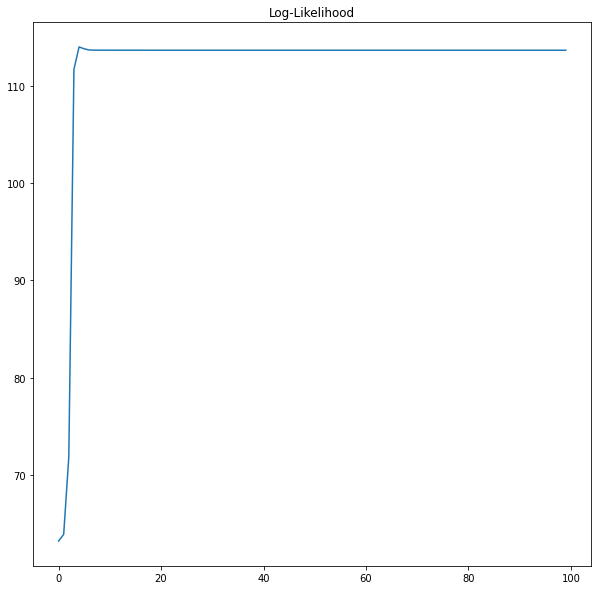

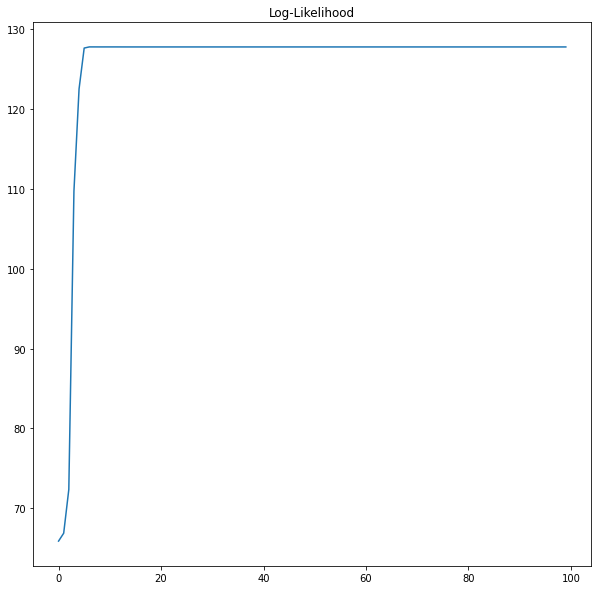

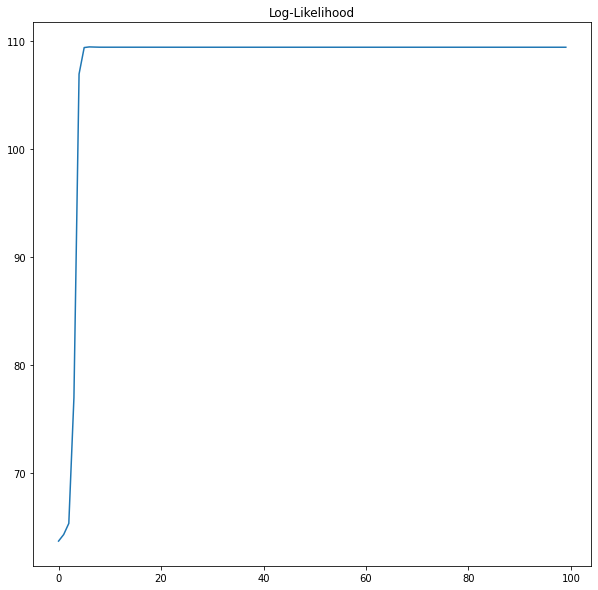

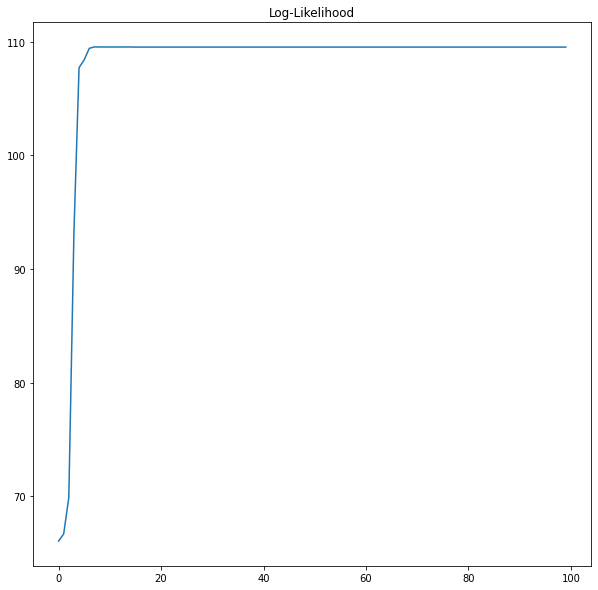

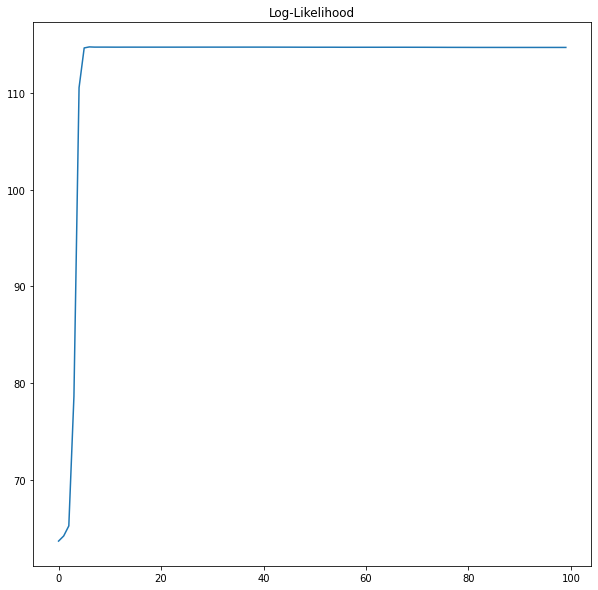

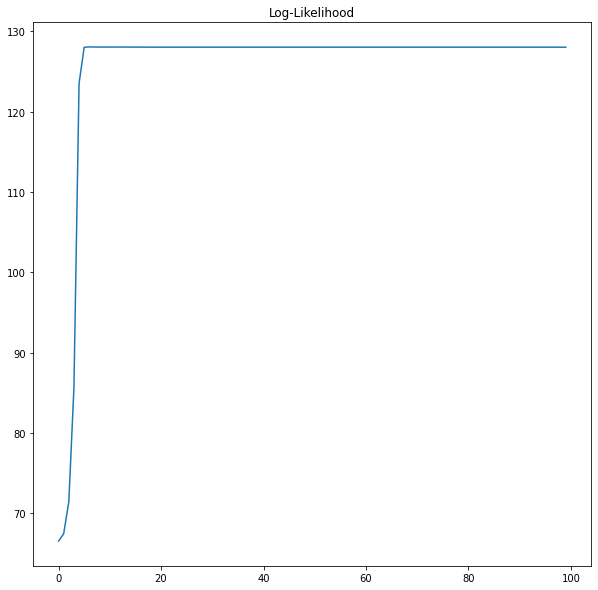

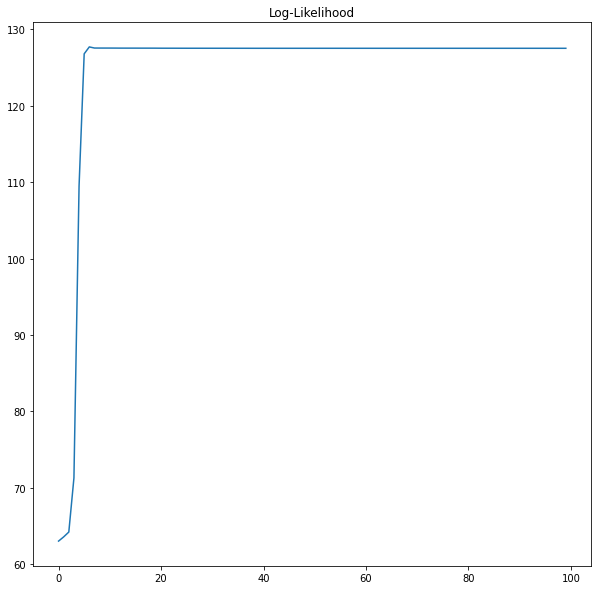

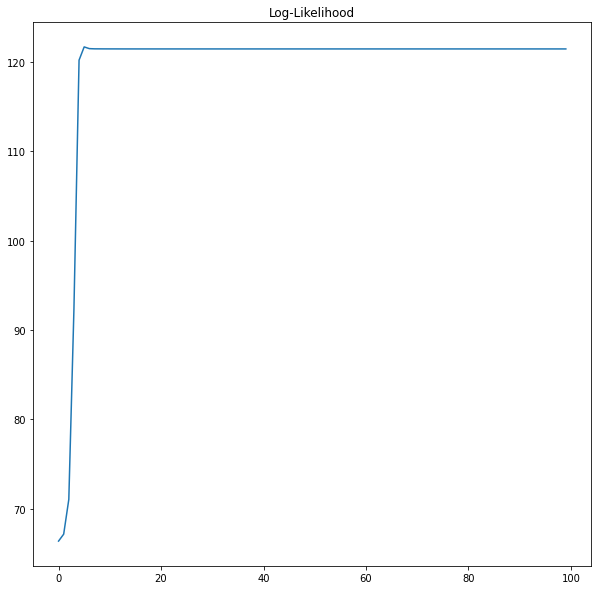

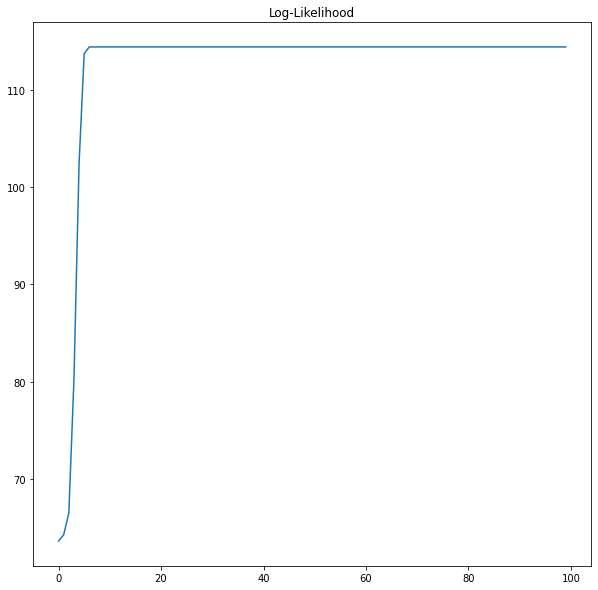

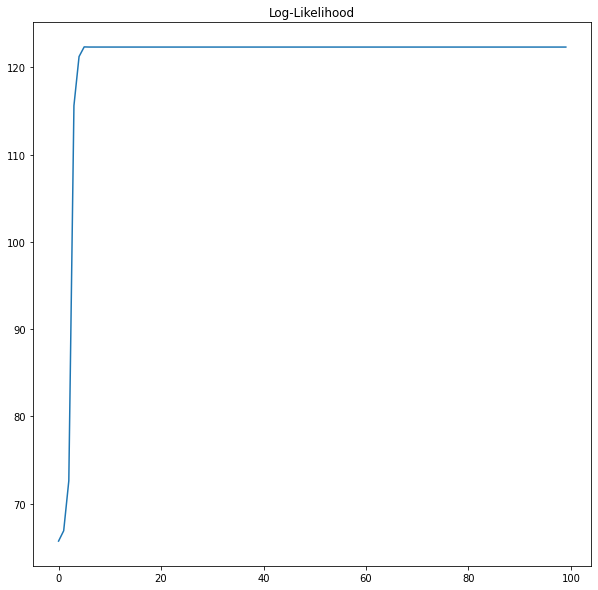

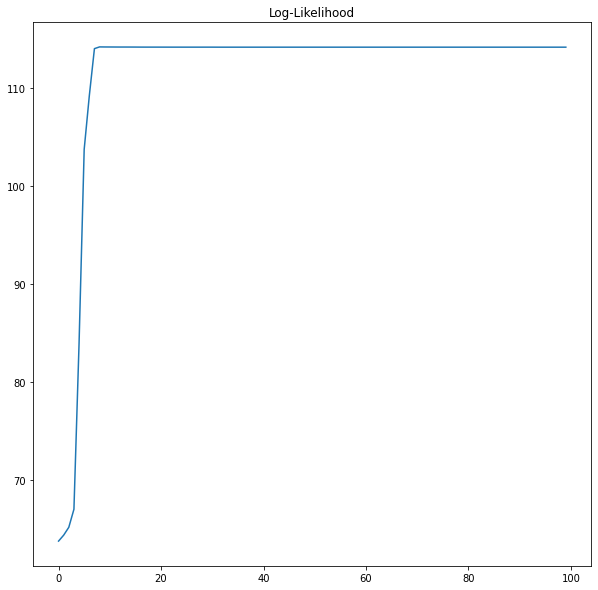

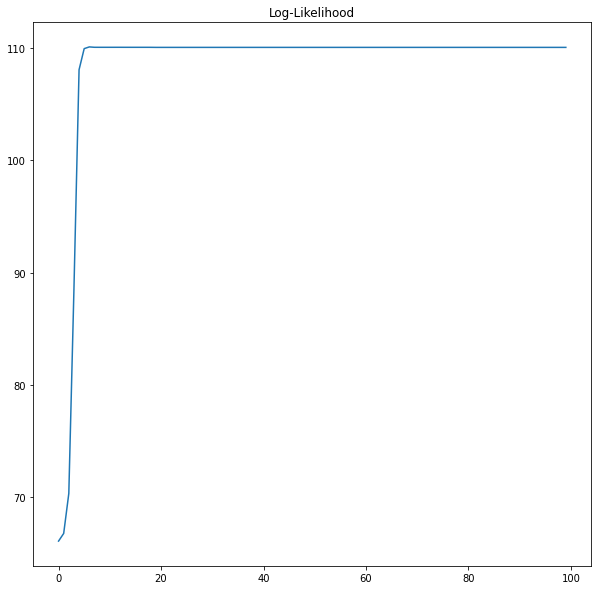

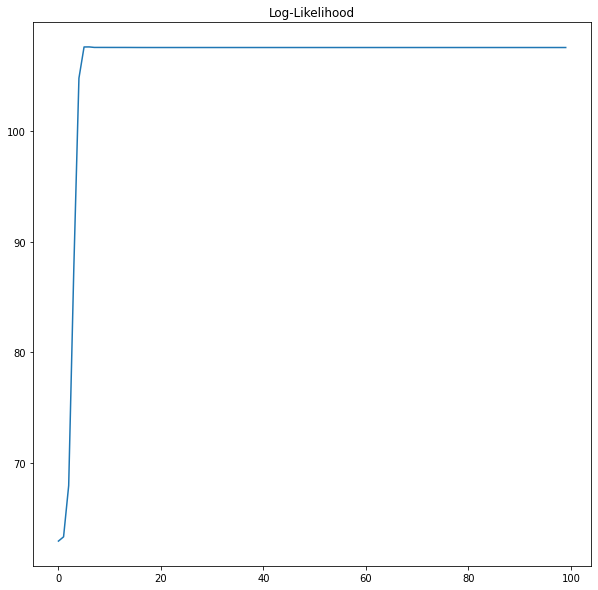

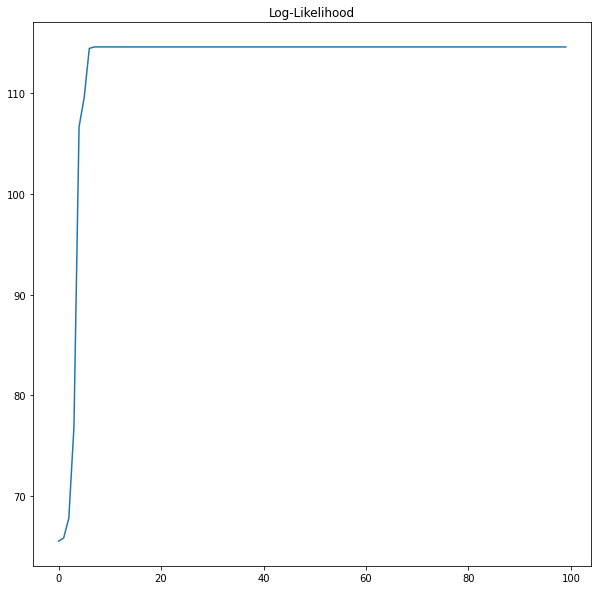

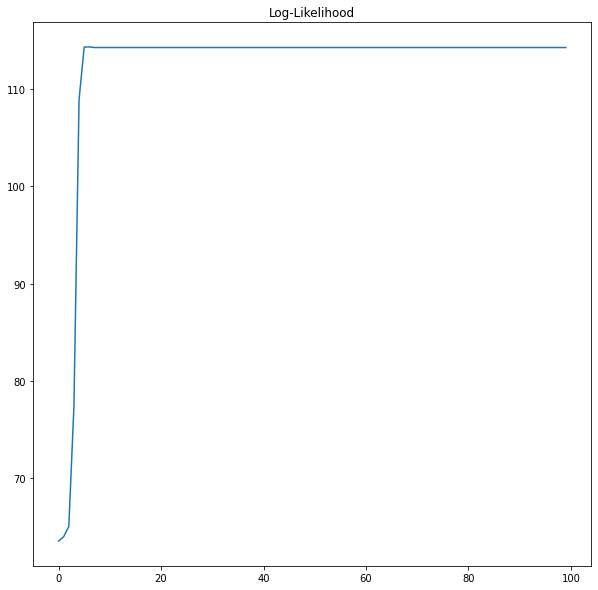

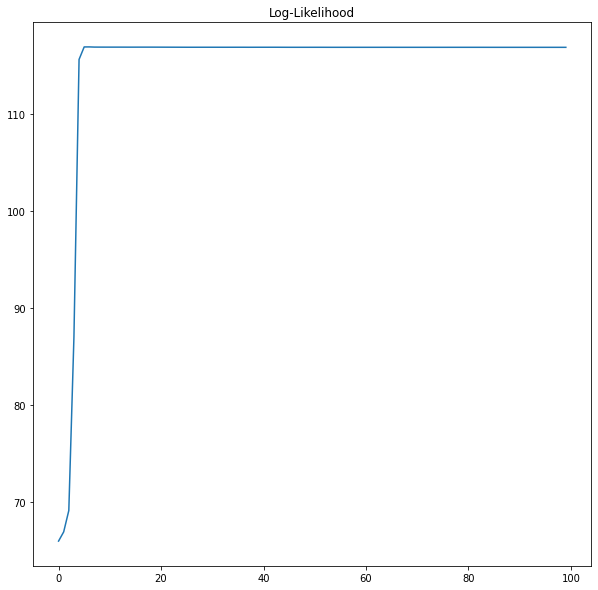

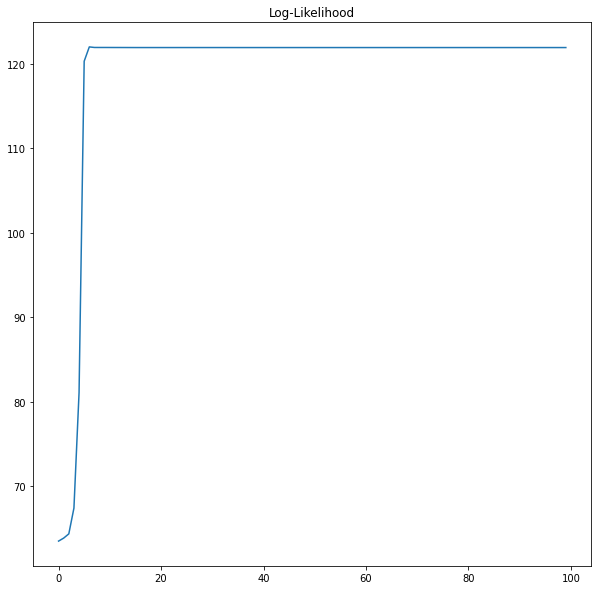

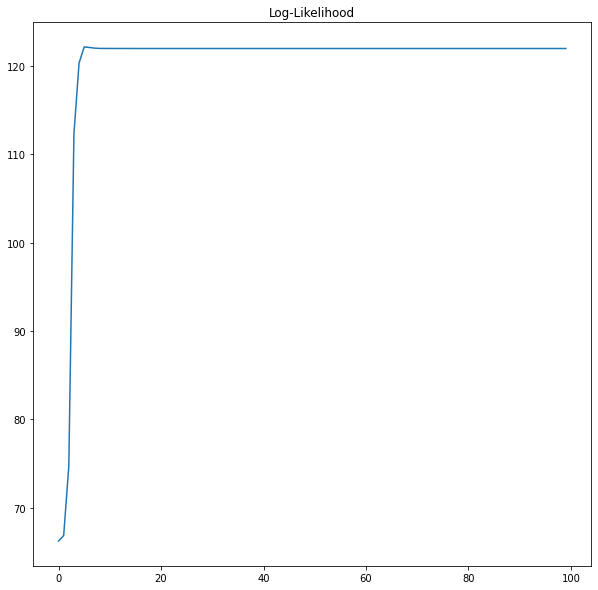

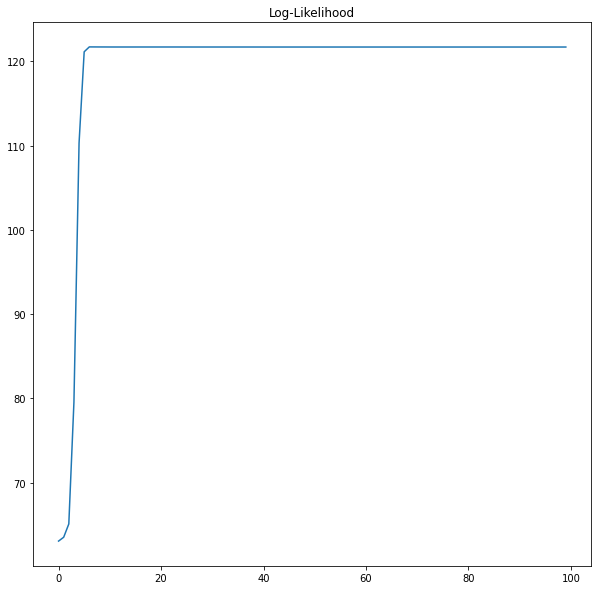

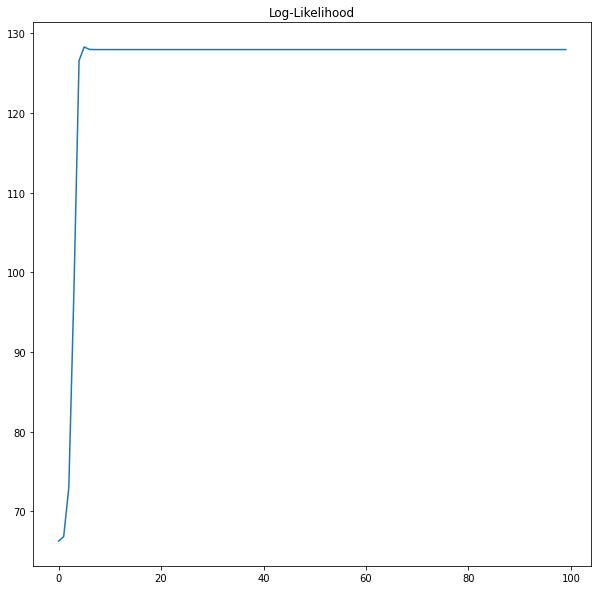

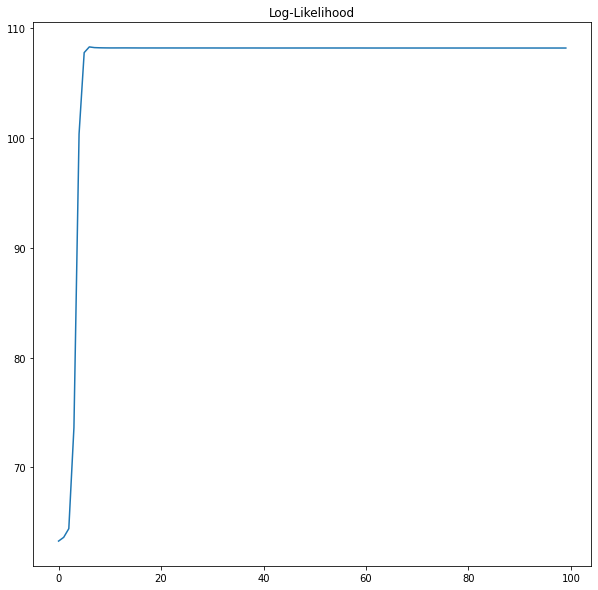

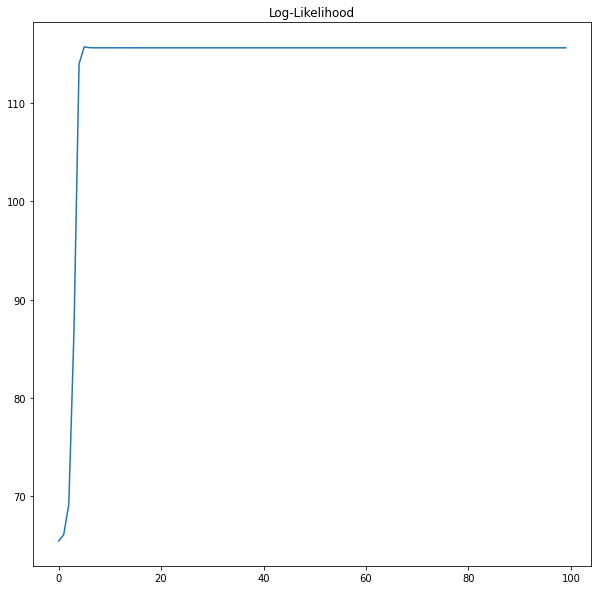

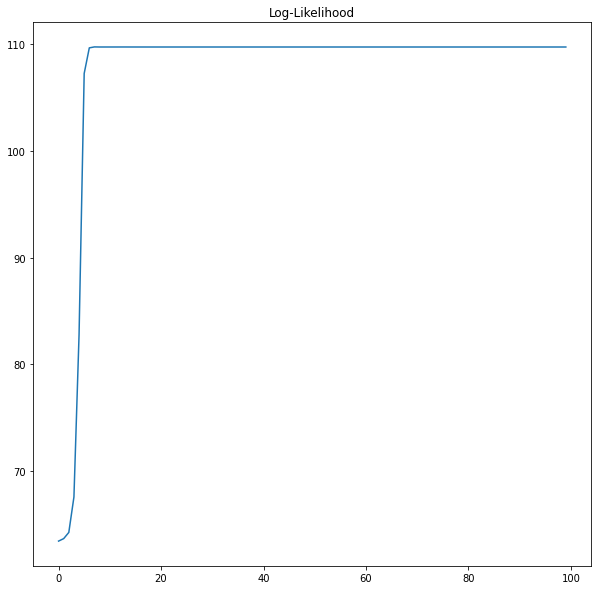

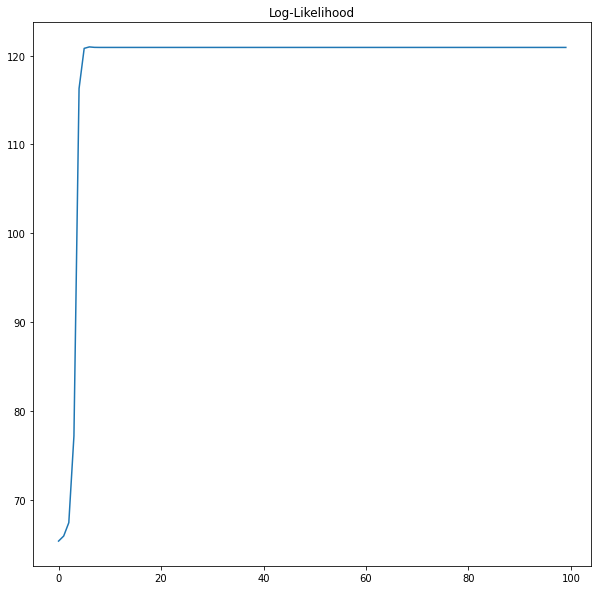

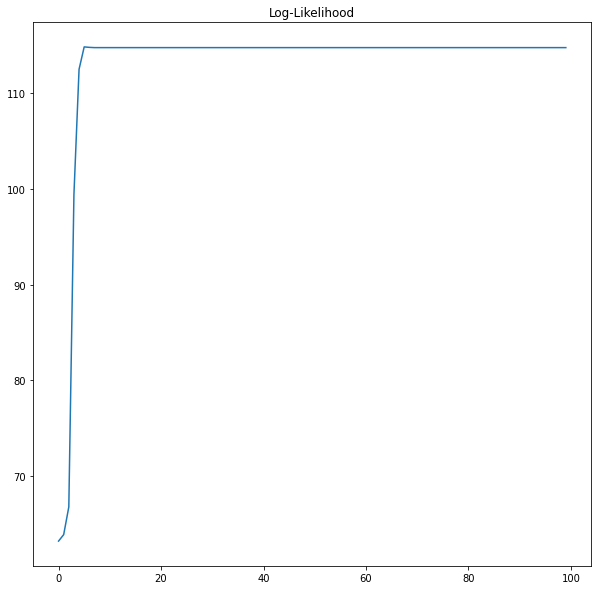

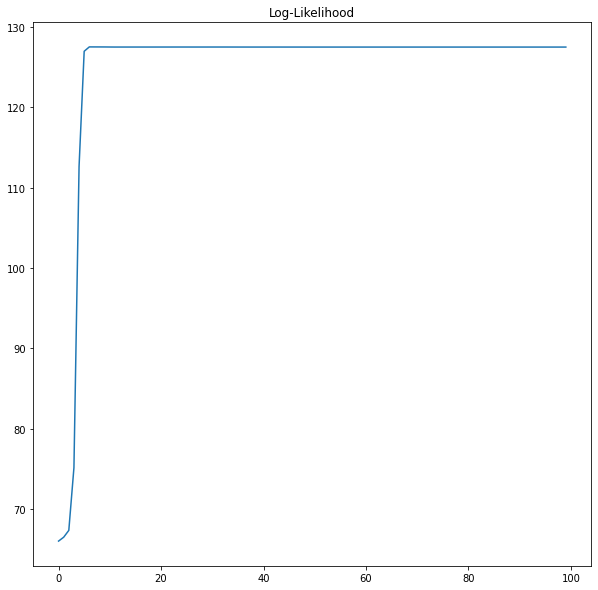

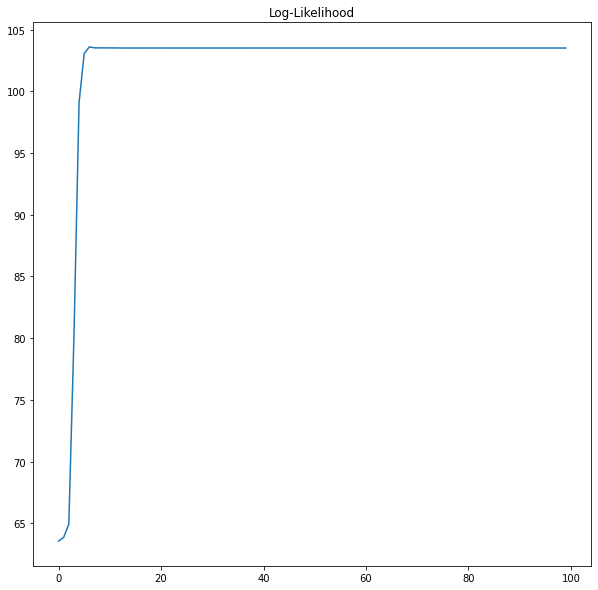

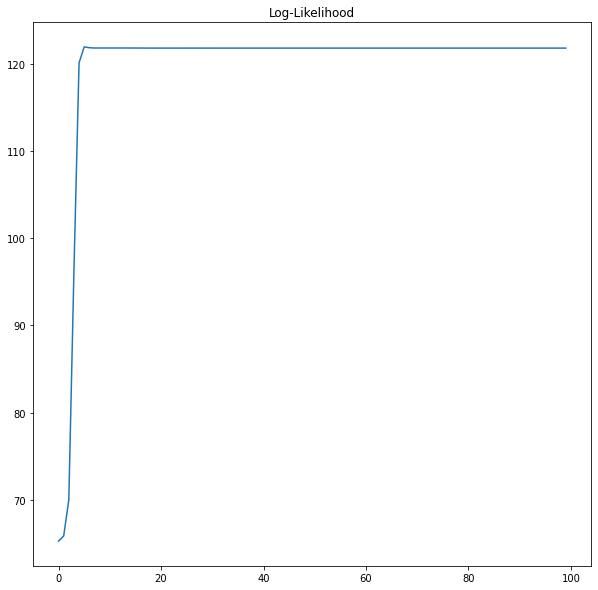

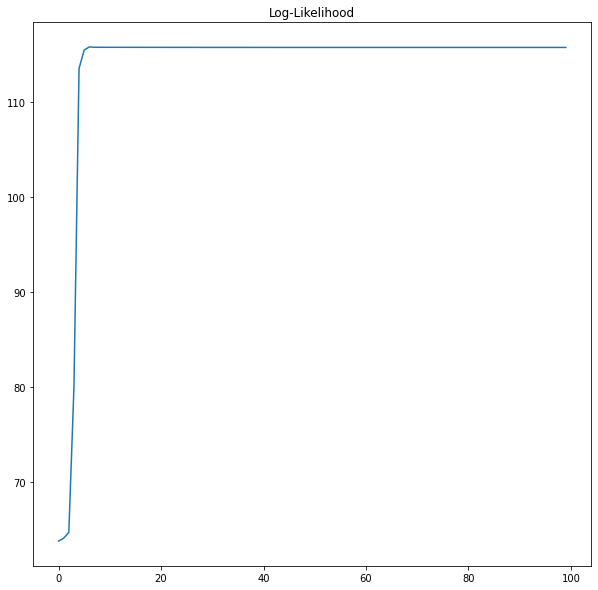

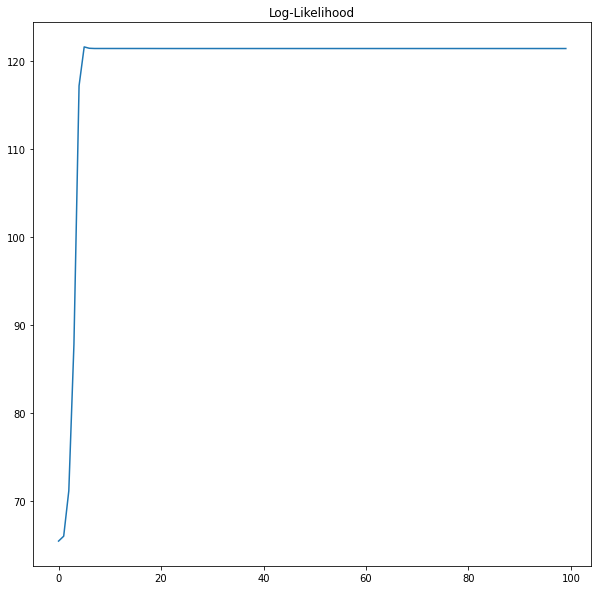

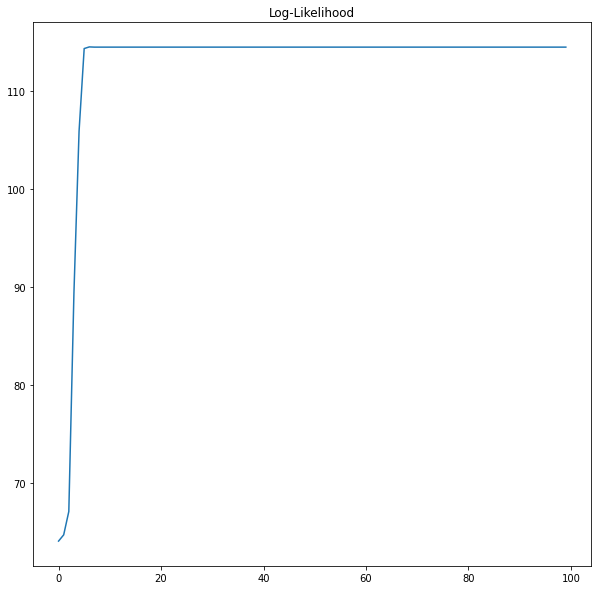

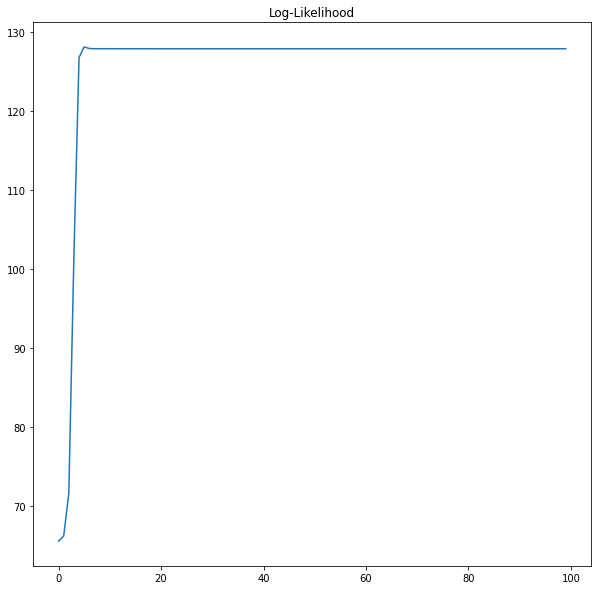

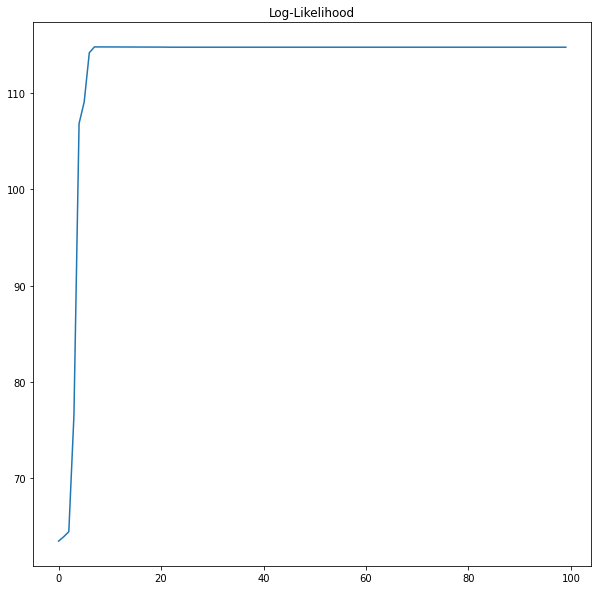

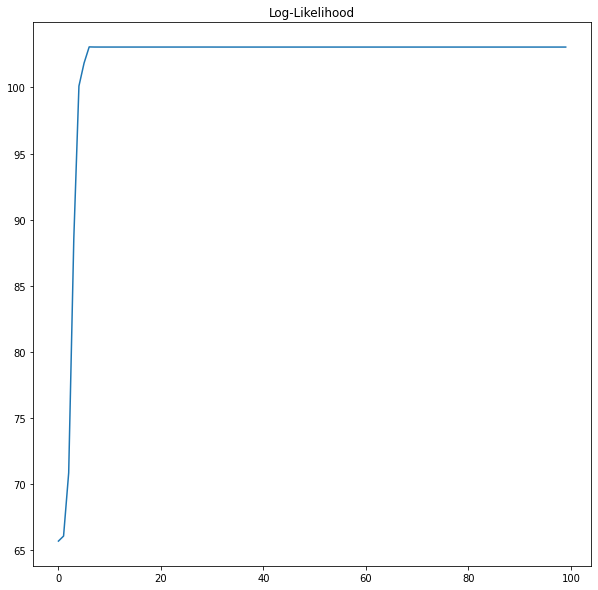

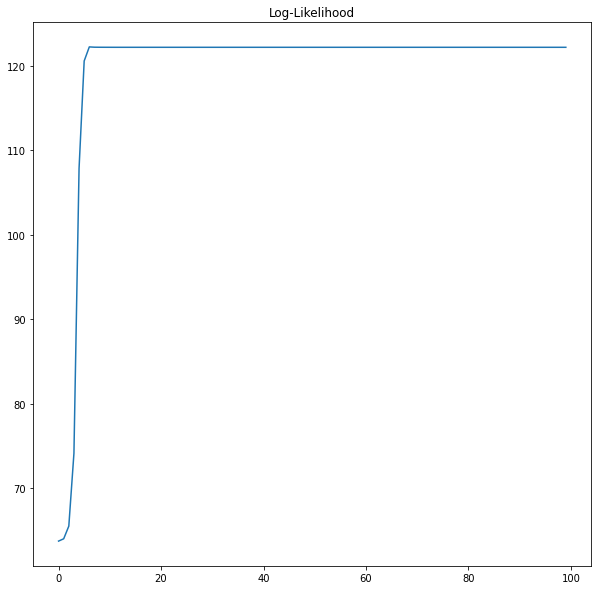

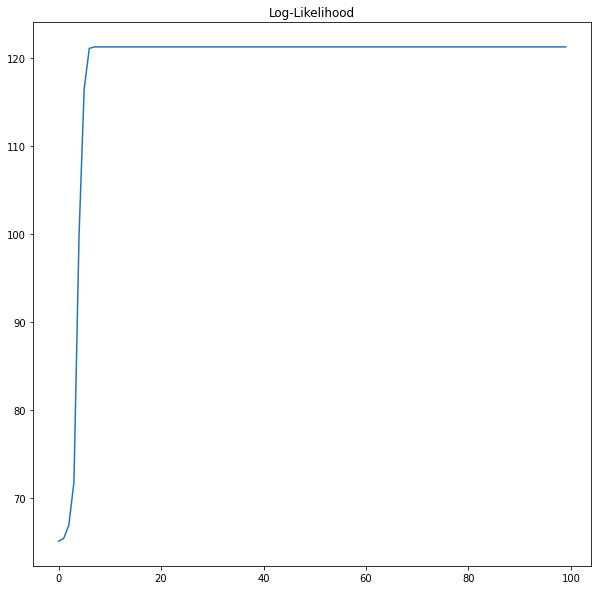

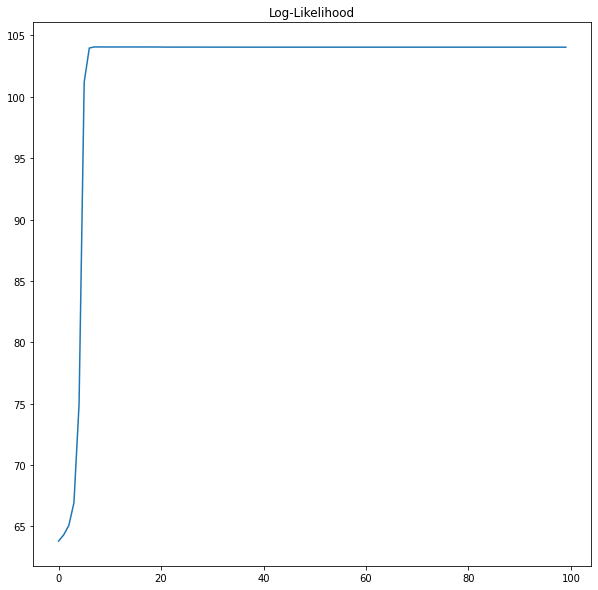

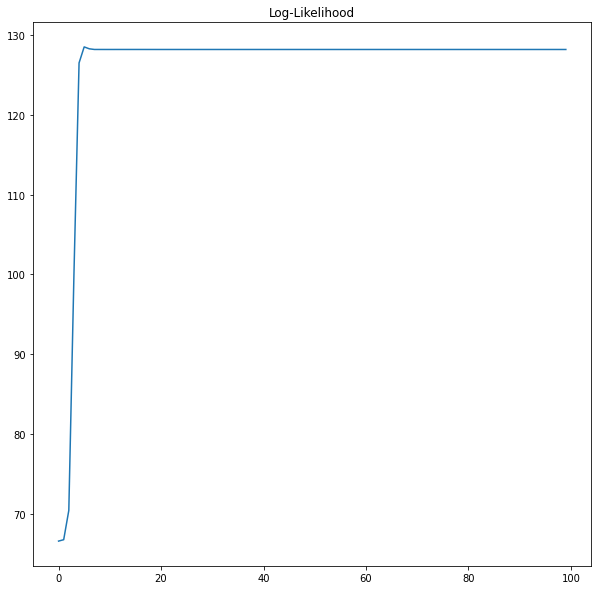

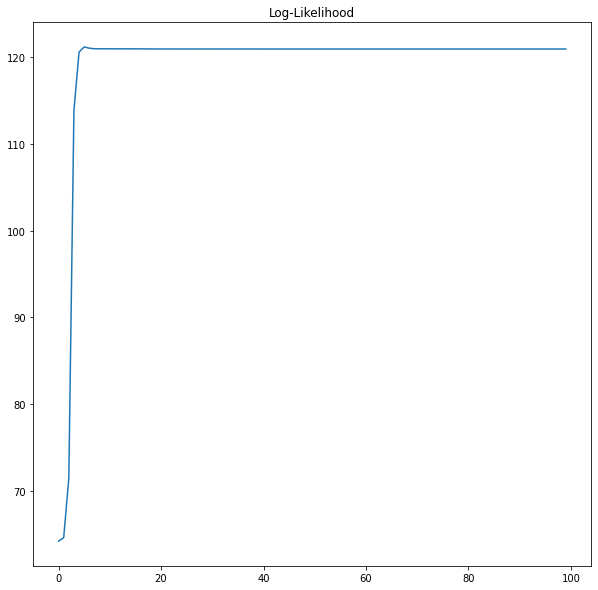

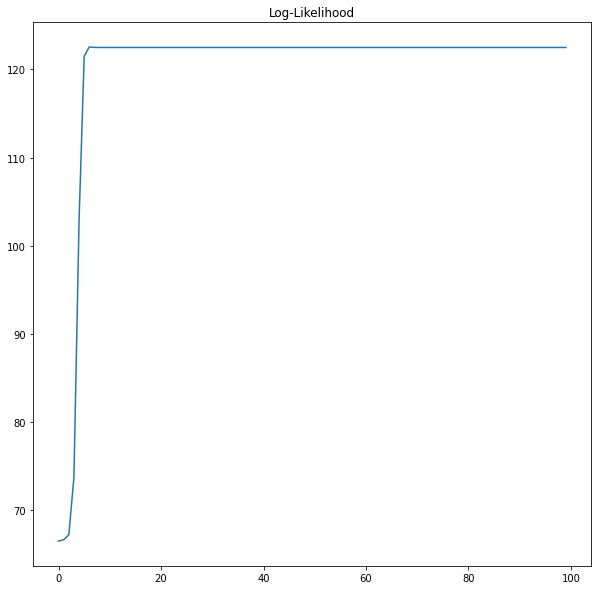

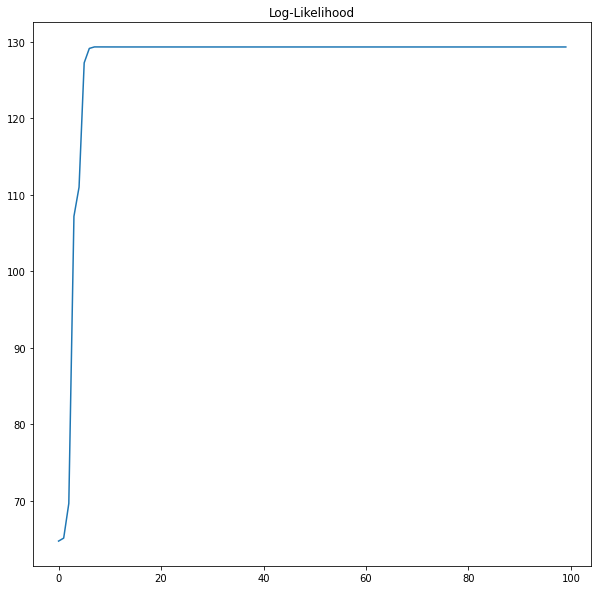

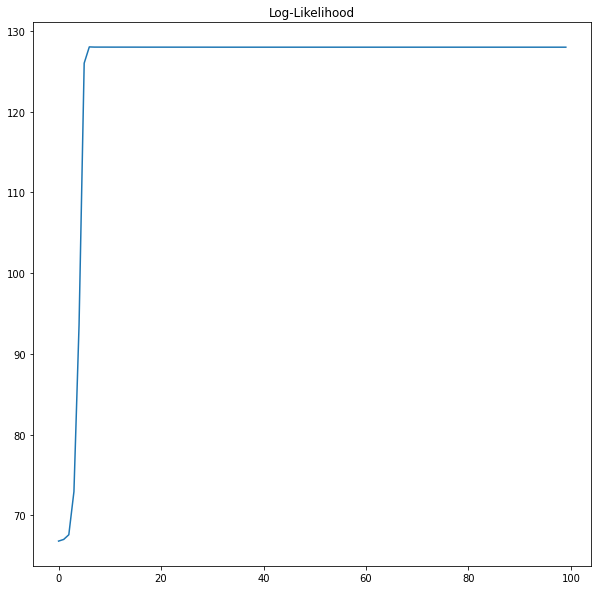

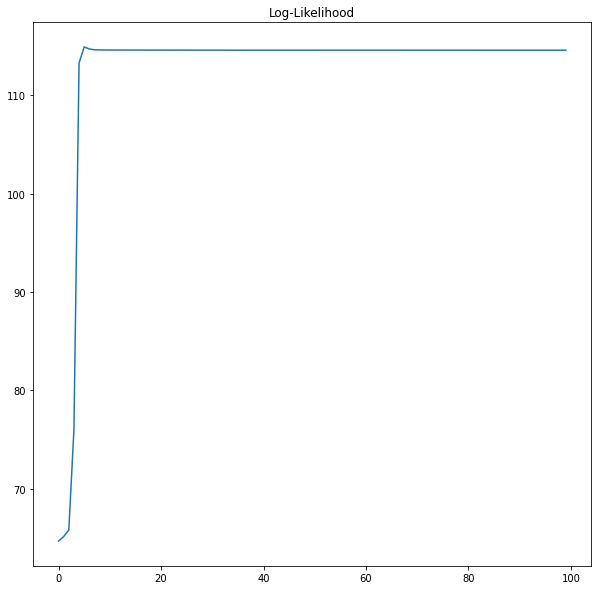

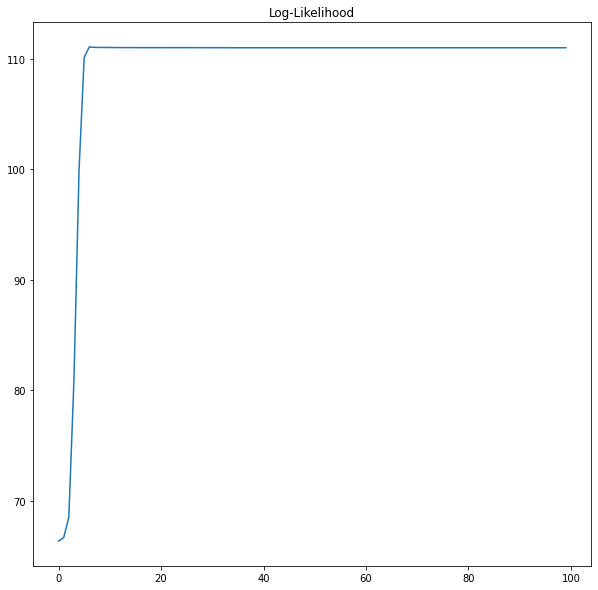

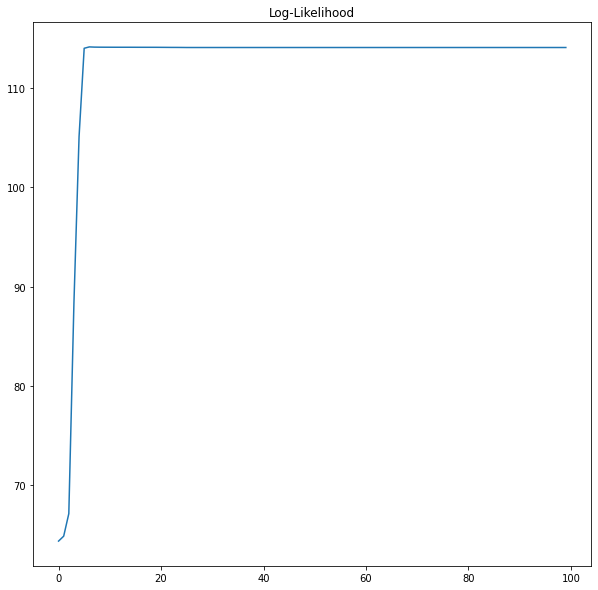

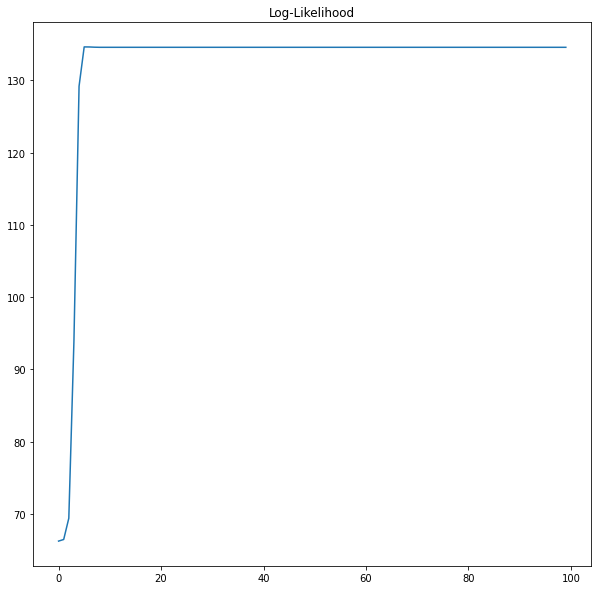

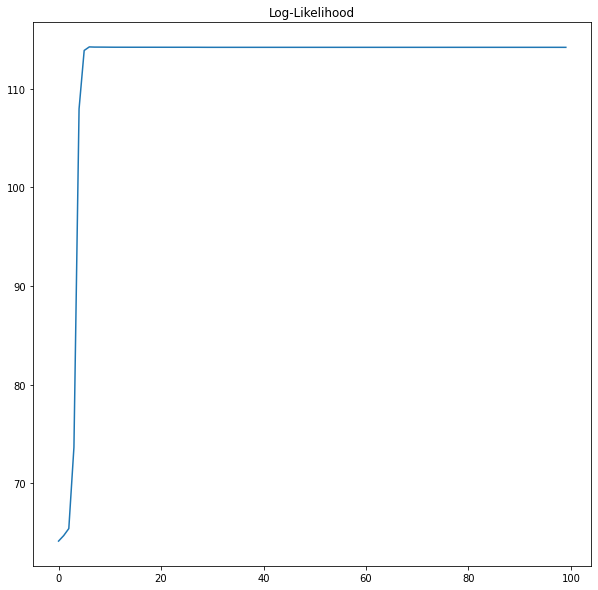

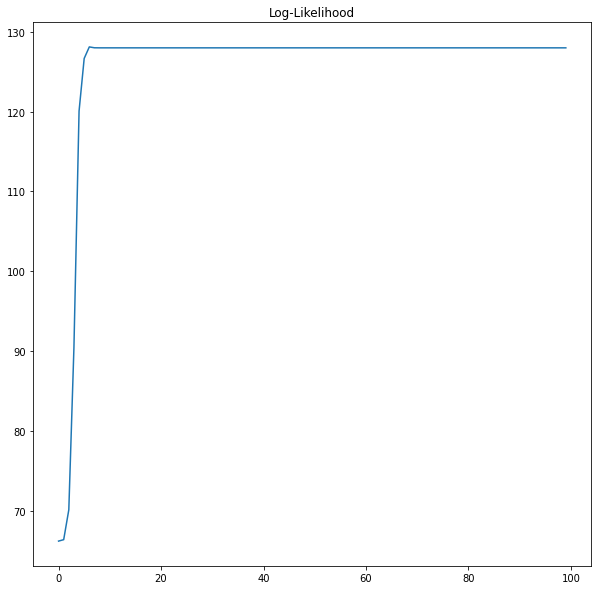

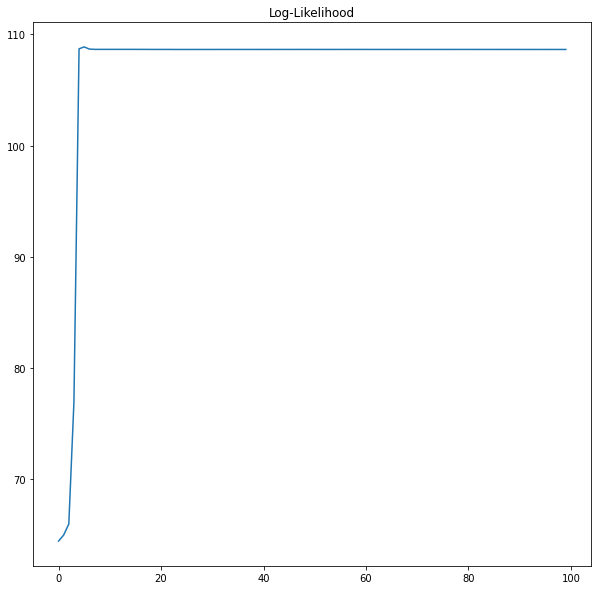

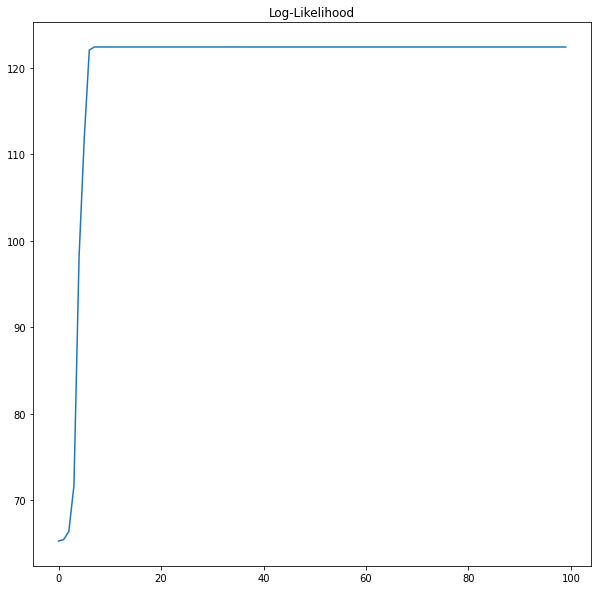

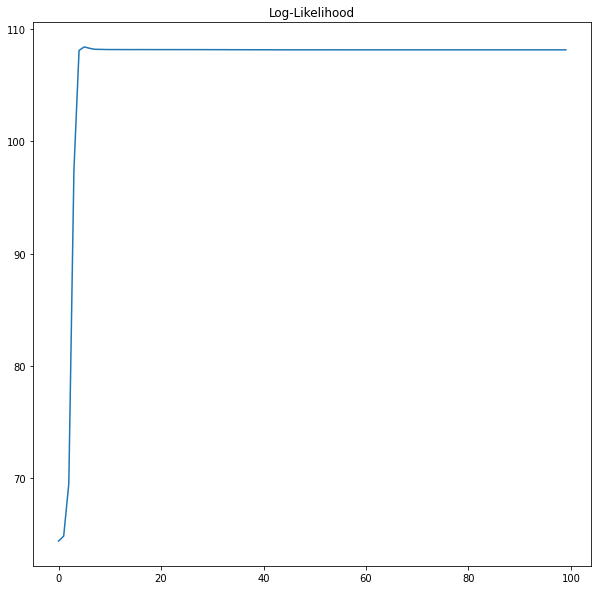

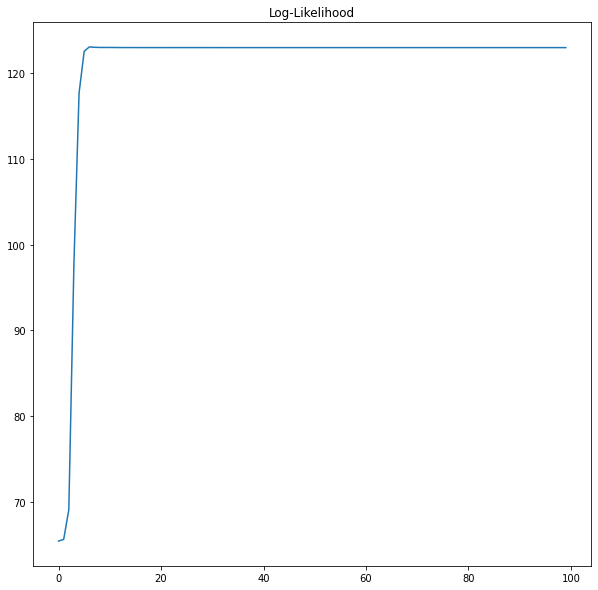

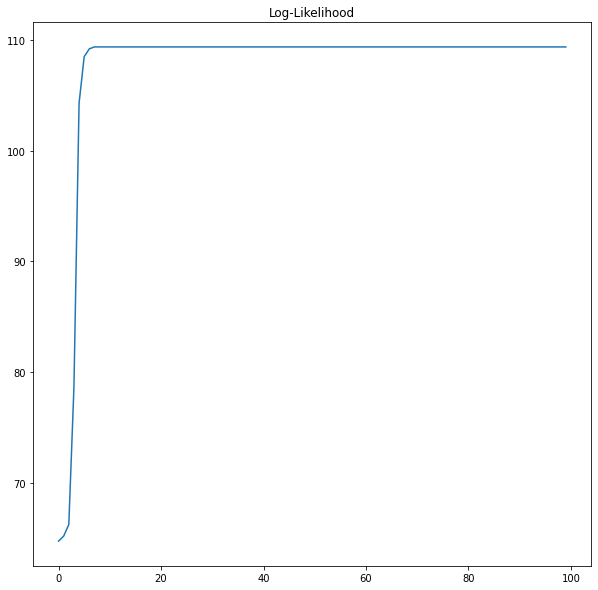

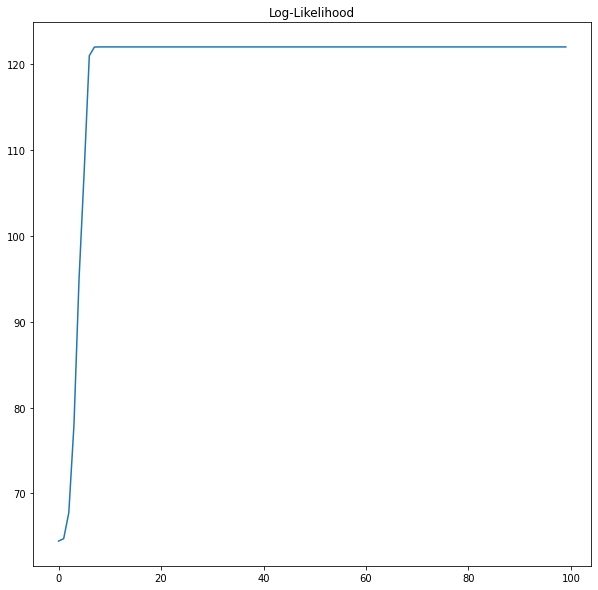

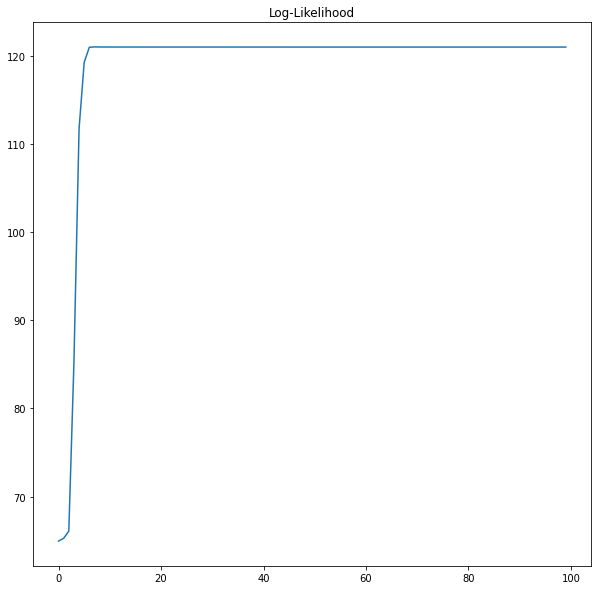

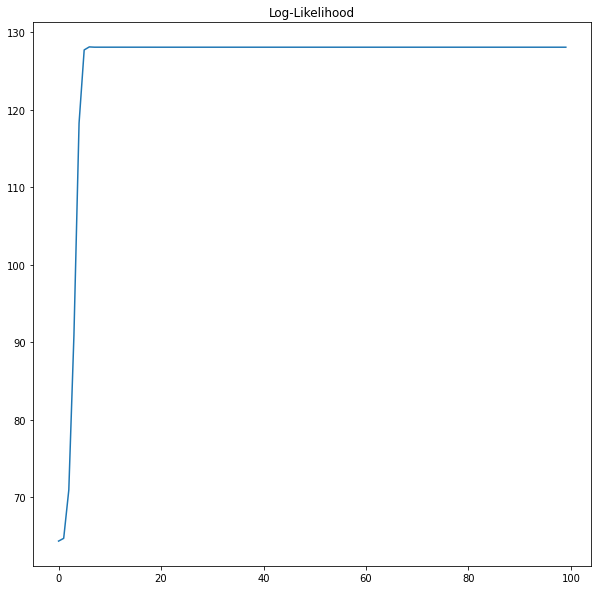

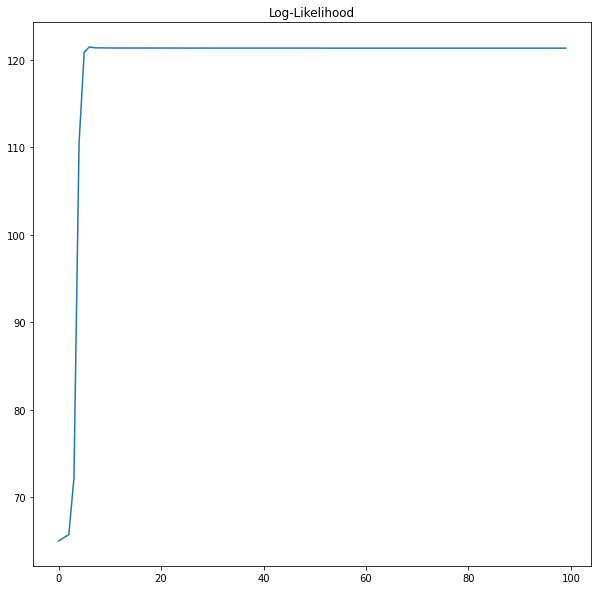

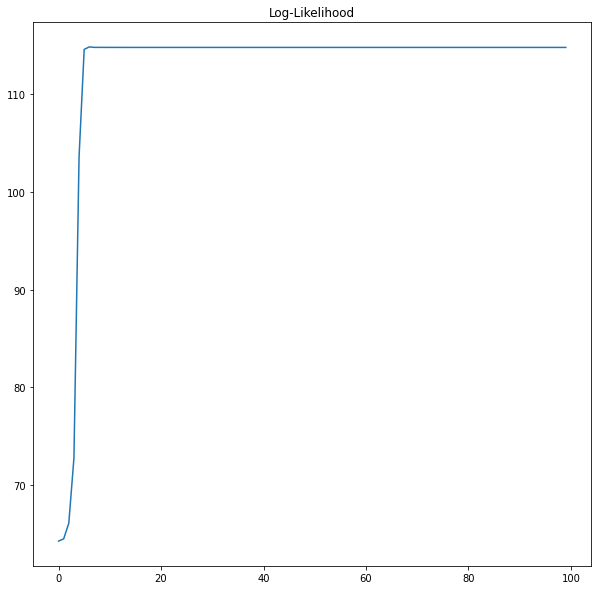

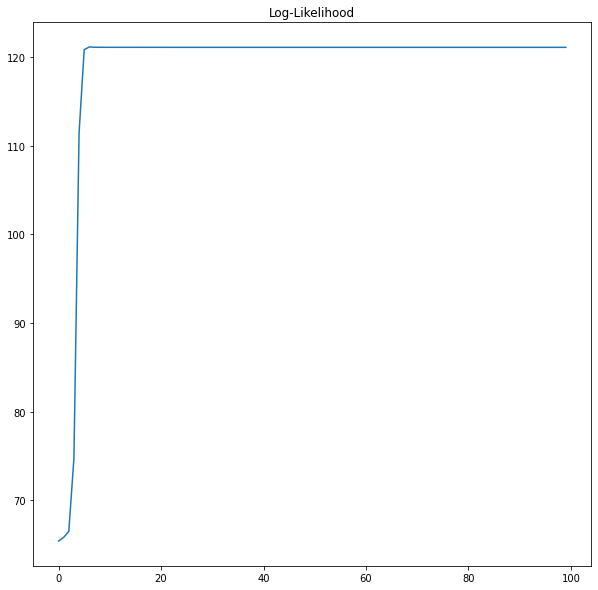

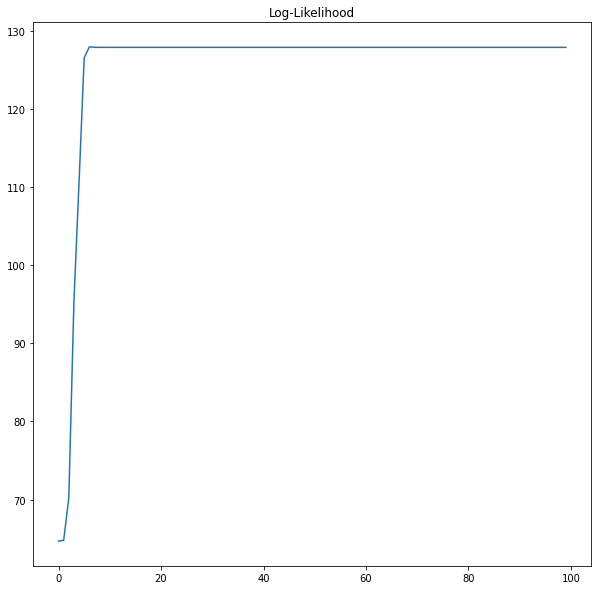

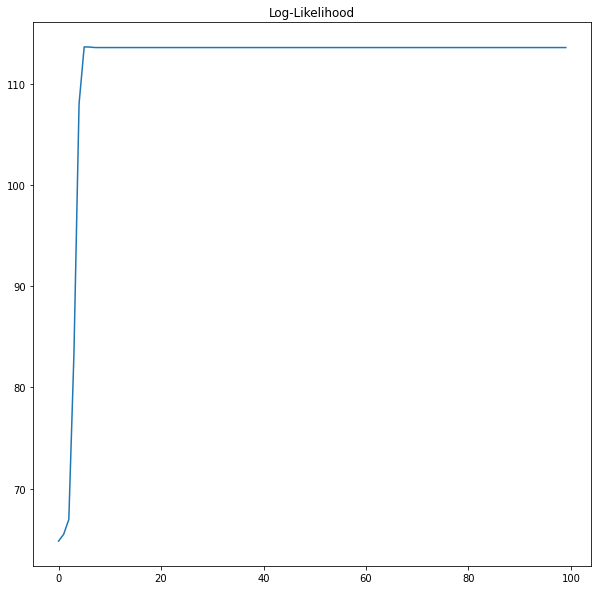

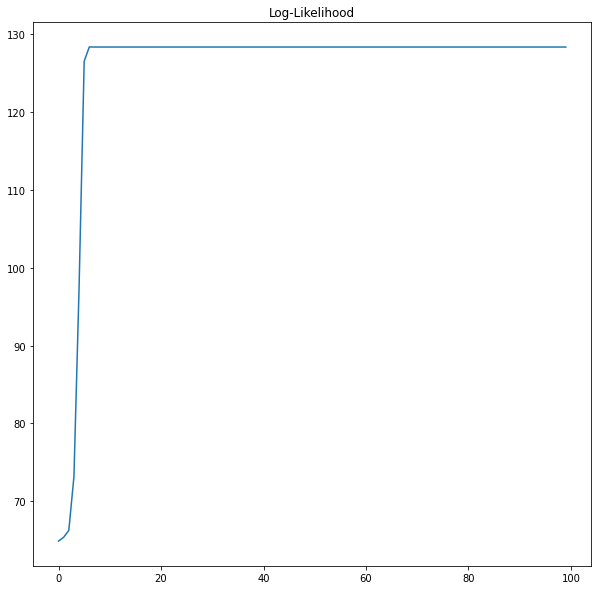

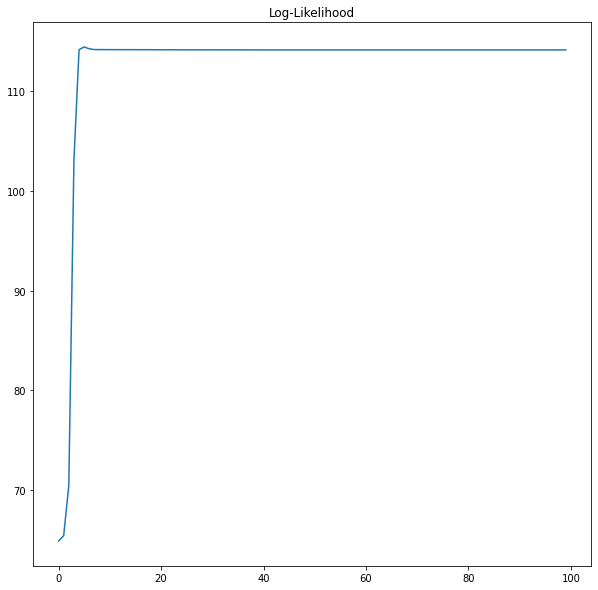

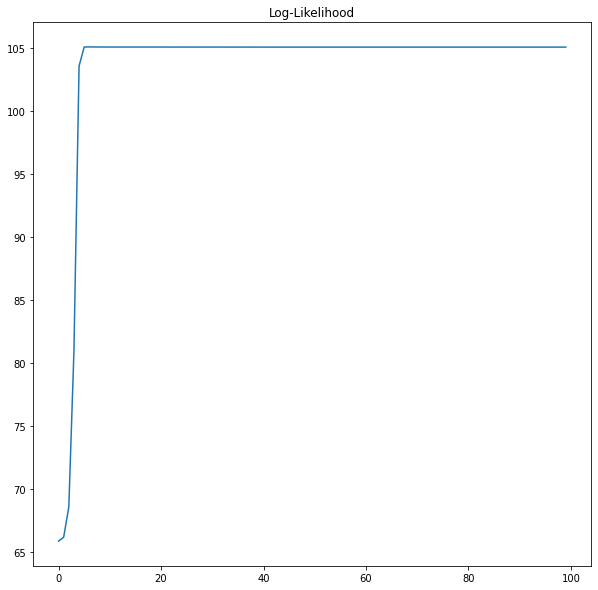

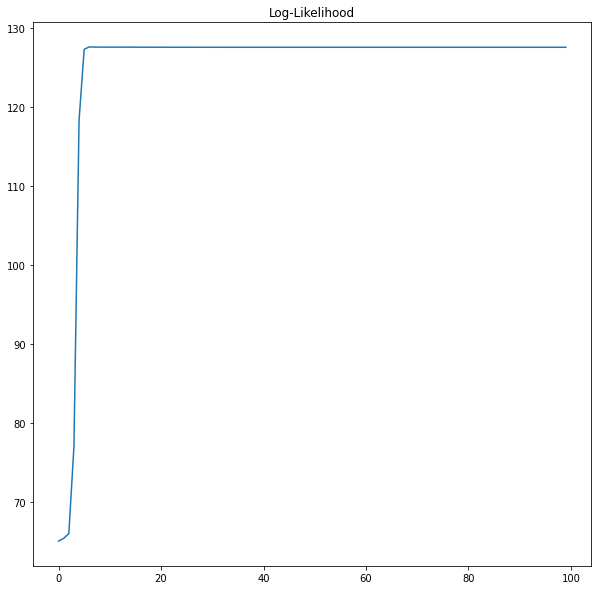

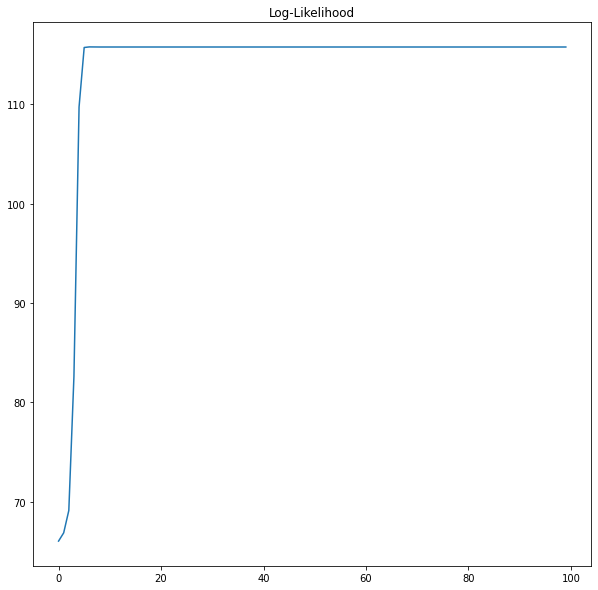

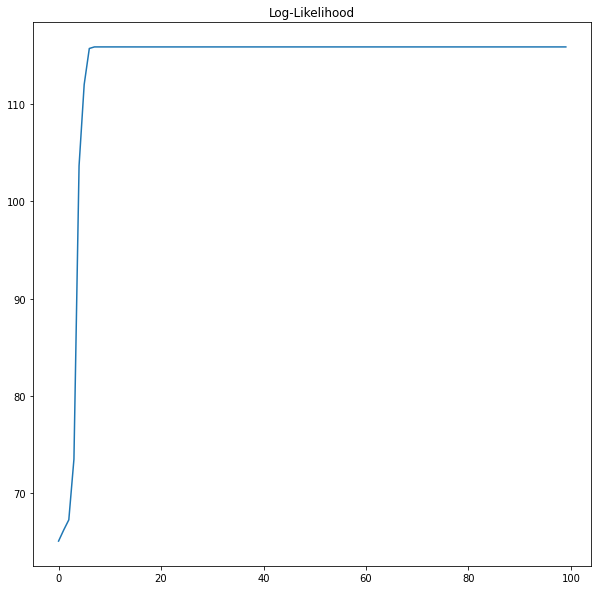

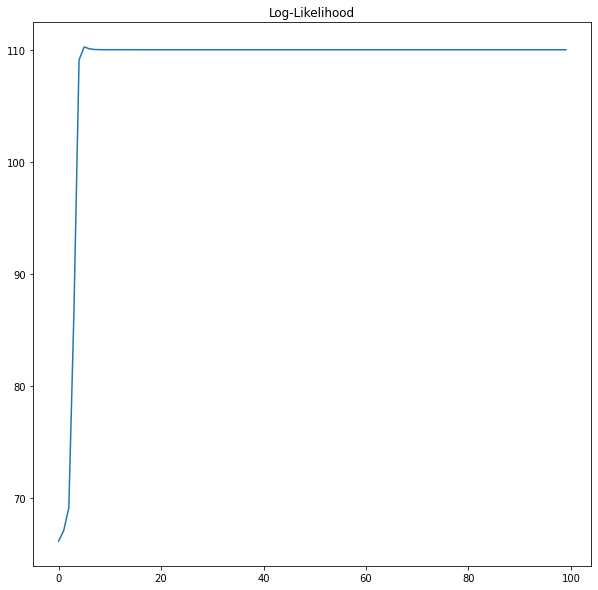

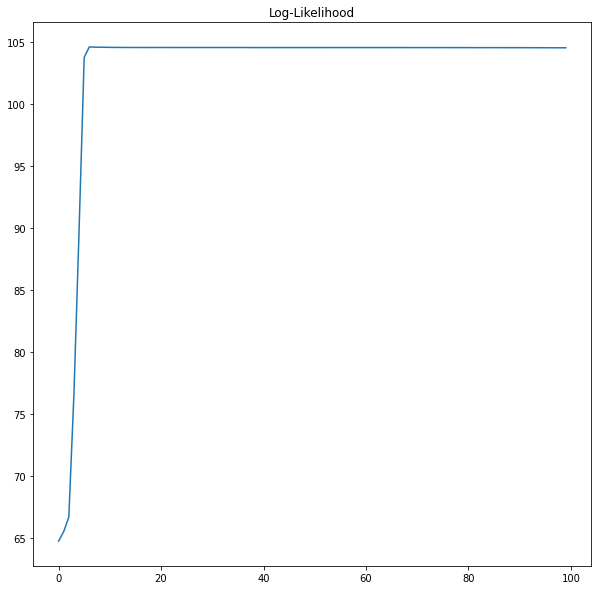

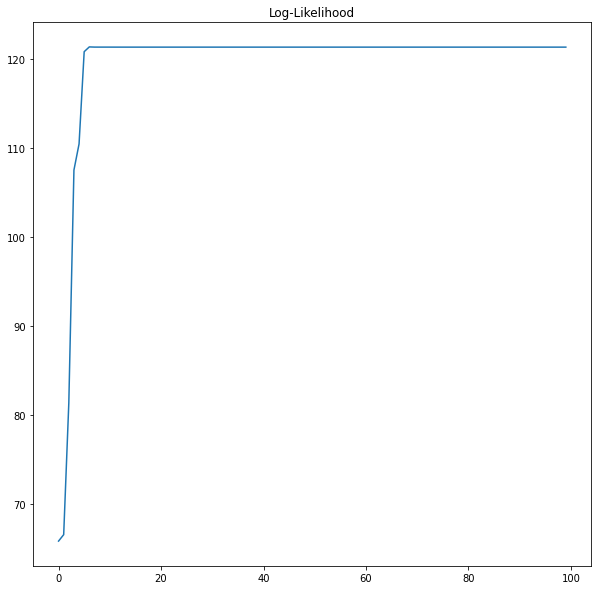

In [9]:
# gmm_classes = {"coast" : [], "highway" : [], "mountain" : [], "opencountry" :[], "tallbuilding" : []}
gmm_classes = {"coast" : [], "highway" : []}
Q = 10

for i in range(35):
    for j in gmm_classes:
        gmm = GMM_3(feature_set[j][i], Q, 100)
        g = gmm.run()
        gmm_classes[j].append(g)
    print("done gmm for feature " , i)

In [11]:
gmm = GMM_3(feature_set[j][i], Q, 100)
g = gmm.run()
gmm_classes[j].append(g)
print("done gmm for feature " , i)

AttributeError: 'list' object has no attribute 'shape'

In [26]:
len(gmm.mu), gmm.mu[0].shape, feature_set[j][i].shape[1]

(10, (23,), 23)